In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
df_larger_annotated = pd.read_csv('/content/drive/MyDrive/IDSIA Biomedical Texts/Tweets Project/large16k_with_annotated_part_and_feat_incl_emb.csv')
df_larger_annotated

,Unnamed: 0,status_id,user_id,created_at,text,panic_kw_count,symptoms_ext_count,i,illness,mental,...,emo_neg,twitter4sse_embeddings,used_for_annotation,A1,A2,A3,A4,A5,A6,majority_vote
0,118,1245863648913813504,1148511375976611840,2020-04-03T00:00:15Z,"Dear World👨‍👩‍👧‍👦, you need not panic, because...",1,0,0.00,12.50,0.00,...,6.25,"[-0.040745142847299576, 0.011479376815259457, ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,308,1245863885204152321,20817049,2020-04-03T00:01:11Z,.@fordnation says releasing the projection mod...,1,0,0.00,0.00,0.00,...,3.57,"[-0.2589869797229767, 0.14035490155220032, 0.0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,327,1245863937247076353,866442835,2020-04-03T00:01:24Z,"""Neurologists around the world say that a smal...",0,1,0.00,5.88,0.00,...,0.00,"[-0.02708950825035572, 0.20832084119319916, -0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,482,1245864250700001280,919734991390724096,2020-04-03T00:02:39Z,Coronavirus: More than one million cases confi...,0,0,2.94,5.88,2.94,...,2.94,"[-0.23723432421684265, 0.072296142578125, -0.2...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,594,1245864498344296449,895000278201708545,2020-04-03T00:03:38Z,"This is my Gov, @henrymcmaster, today, 4/2/202...",0,1,2.38,0.00,0.00,...,0.00,"[-0.42780137062072754, 0.127772256731987, -0.2...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16535,3246439,1248759142933835776,162719860,2020-04-10T23:45:55Z,My story about #specialneeds kids &amp; #silve...,0,0,3.70,11.11,7.41,...,3.70,"[-0.2954484224319458, -0.21568302810192108, 0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16536,3246515,1248759404666765312,381842403,2020-04-10T23:46:57Z,"Just a quick update: Thursday afternoon, mum h...",0,0,2.00,8.00,2.00,...,2.00,"[-0.03530991077423096, 0.17665432393550873, -0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16537,3247045,1248761313091780609,1621100112,2020-04-10T23:54:32Z,#COVID_19 \n•We are all we've got.\n•Don’t giv...,1,0,0.00,0.00,0.00,...,4.55,"[-0.20700444281101227, 0.01790219359099865, 0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16538,3247300,1248762191660093451,494002295,2020-04-10T23:58:02Z,COVID-19 Mental Health Resources from the Coun...,1,0,0.00,6.25,12.50,...,6.25,"[-0.2529967129230499, 0.08556650578975677, -0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_larger_annotated['majority_vote'].value_counts()

PP            94
PONP          59
NoMajority    53
UN             7
Name: majority_vote, dtype: int64

## Converting embedding column which is in string to list

In [4]:
df_larger_annotated['twitter4sse_embeddings'] = df_larger_annotated['twitter4sse_embeddings'].apply(lambda x: eval(x))

## Getting Majority votes from original 213, we get 160

In [5]:
df_annotated = df_larger_annotated[(df_larger_annotated.used_for_annotation==1) & (df_larger_annotated.majority_vote!="NoMajority")]
df_annotated

,Unnamed: 0,status_id,user_id,created_at,text,panic_kw_count,symptoms_ext_count,i,illness,mental,...,emo_neg,twitter4sse_embeddings,used_for_annotation,A1,A2,A3,A4,A5,A6,majority_vote
105,21195,1245916048517292033,297944588,2020-04-03T03:28:28Z,Fuck you china. I was 2 years clear of severe ...,1,0,11.54,3.85,7.69,...,11.54,"[-0.22512023150920868, 0.03707732632756233, 0....",1,PP,PP,PP,PP,PP,PP,PP
107,21587,1245916935998464005,1116031804165767169,2020-04-03T03:32:00Z,Feeling so off today and I can’t tell if this ...,1,0,12.00,4.00,8.00,...,8.00,"[0.010432062670588493, 0.121722012758255, -0.2...",1,PP,PP,PP,PP,PP,PP,PP
138,26533,1245928581353467910,3284687677,2020-04-03T04:18:16Z,Good lord people we need to stop having people...,1,0,9.52,2.38,4.76,...,4.76,"[-0.20182527601718903, 0.24901598691940308, 0....",1,PP,UN,PP,PONP,PP,PP,PP
172,30413,1245940255993155584,1136453384054034432,2020-04-03T05:04:40Z,"I'm telling yall, Chill the fuck out!! This Vi...",0,1,2.33,4.65,2.33,...,2.33,"[0.18443672358989716, 0.22256337106227875, 0.2...",1,PONP,PONP,PONP,PONP,PONP,PP,PONP
288,50758,1245998640499322881,2677225992,2020-04-03T08:56:40Z,Episode of #CoronaVirus panic. Man took his gl...,1,1,6.90,1.72,0.00,...,1.72,"[-0.07753666490316391, -0.44565826654434204, -...",1,PP,PP,PP,PP,PP,PP,PP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15601,3028959,1250474359715594240,747257810010931201,2020-04-15T17:21:34Z,"I have true compassion for these families, but...",1,0,2.33,2.33,4.65,...,6.98,"[-0.36669501662254333, 0.15450149774551392, -0...",1,PONP,PONP,PONP,PONP,PONP,PP,PONP
15832,3086951,1250568412746612737,256188572,2020-04-15T23:35:18Z,"My mom called asked me to come over, she is on...",1,1,11.11,0.00,3.70,...,7.41,"[-0.0625092014670372, -0.19092148542404175, 0....",1,PONP,PONP,PONP,PP,PONP,PP,PONP
15838,3088475,1250572544215642112,1172938416125808640,2020-04-15T23:51:43Z,Having a panic attack while grocery shopping i...,1,0,9.09,2.27,4.55,...,6.82,"[-0.05952261760830879, -0.3383149802684784, -0...",1,PP,PONP,PP,PONP,PP,PP,PP
16087,3144693,1248575471241093120,143915733,2020-04-10T11:36:04Z,Irresponsible reporting and telling people sha...,1,1,0.00,5.13,0.00,...,2.56,"[-0.029525309801101685, 0.2843950092792511, -0...",1,PONP,UN,PONP,PONP,PONP,UN,PONP


In [6]:
df_annotated['majority_vote'].value_counts()

PP      94
PONP    59
UN       7
Name: majority_vote, dtype: int64

In [7]:
# changing PONP to PO because new data (discrepancy annotated 119) has PO instead of PONP, they mean the same thing tho

df_annotated['majority_vote'] = df_annotated['majority_vote'].map({'PP':'PP', 'PONP': 'PO', 'UN': 'UN'})
df_annotated

<ipython-input-7-c136fb7485e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annotated['majority_vote'] = df_annotated['majority_vote'].map({'PP':'PP', 'PONP': 'PO', 'UN': 'UN'})


,Unnamed: 0,status_id,user_id,created_at,text,panic_kw_count,symptoms_ext_count,i,illness,mental,...,emo_neg,twitter4sse_embeddings,used_for_annotation,A1,A2,A3,A4,A5,A6,majority_vote
105,21195,1245916048517292033,297944588,2020-04-03T03:28:28Z,Fuck you china. I was 2 years clear of severe ...,1,0,11.54,3.85,7.69,...,11.54,"[-0.22512023150920868, 0.03707732632756233, 0....",1,PP,PP,PP,PP,PP,PP,PP
107,21587,1245916935998464005,1116031804165767169,2020-04-03T03:32:00Z,Feeling so off today and I can’t tell if this ...,1,0,12.00,4.00,8.00,...,8.00,"[0.010432062670588493, 0.121722012758255, -0.2...",1,PP,PP,PP,PP,PP,PP,PP
138,26533,1245928581353467910,3284687677,2020-04-03T04:18:16Z,Good lord people we need to stop having people...,1,0,9.52,2.38,4.76,...,4.76,"[-0.20182527601718903, 0.24901598691940308, 0....",1,PP,UN,PP,PONP,PP,PP,PP
172,30413,1245940255993155584,1136453384054034432,2020-04-03T05:04:40Z,"I'm telling yall, Chill the fuck out!! This Vi...",0,1,2.33,4.65,2.33,...,2.33,"[0.18443672358989716, 0.22256337106227875, 0.2...",1,PONP,PONP,PONP,PONP,PONP,PP,PO
288,50758,1245998640499322881,2677225992,2020-04-03T08:56:40Z,Episode of #CoronaVirus panic. Man took his gl...,1,1,6.90,1.72,0.00,...,1.72,"[-0.07753666490316391, -0.44565826654434204, -...",1,PP,PP,PP,PP,PP,PP,PP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15601,3028959,1250474359715594240,747257810010931201,2020-04-15T17:21:34Z,"I have true compassion for these families, but...",1,0,2.33,2.33,4.65,...,6.98,"[-0.36669501662254333, 0.15450149774551392, -0...",1,PONP,PONP,PONP,PONP,PONP,PP,PO
15832,3086951,1250568412746612737,256188572,2020-04-15T23:35:18Z,"My mom called asked me to come over, she is on...",1,1,11.11,0.00,3.70,...,7.41,"[-0.0625092014670372, -0.19092148542404175, 0....",1,PONP,PONP,PONP,PP,PONP,PP,PO
15838,3088475,1250572544215642112,1172938416125808640,2020-04-15T23:51:43Z,Having a panic attack while grocery shopping i...,1,0,9.09,2.27,4.55,...,6.82,"[-0.05952261760830879, -0.3383149802684784, -0...",1,PP,PONP,PP,PONP,PP,PP,PP
16087,3144693,1248575471241093120,143915733,2020-04-10T11:36:04Z,Irresponsible reporting and telling people sha...,1,1,0.00,5.13,0.00,...,2.56,"[-0.029525309801101685, 0.2843950092792511, -0...",1,PONP,UN,PONP,PONP,PONP,UN,PO


In [8]:
df_annotated['majority_vote'].value_counts()

PP    94
PO    59
UN     7
Name: majority_vote, dtype: int64

In [40]:
# dropping 160 rows from 16k
# df_unannotated = df_larger_annotated.drop(index = list(df_annotated.index))
# df_unannotated

df_unannotated = df_larger_annotated[~((df_larger_annotated.used_for_annotation==1) & (df_larger_annotated.majority_vote!="NoMajority"))]
df_unannotated

,Unnamed: 0,status_id,user_id,created_at,text,panic_kw_count,symptoms_ext_count,i,illness,mental,tone_neg,emo_neg,twitter4sse_embeddings,used_for_annotation,A1,A2,A3,A4,A5,A6,majority_vote
0,118,1245863648913813504,1148511375976611840,2020-04-03T00:00:15Z,"Dear World👨‍👩‍👧‍👦, you need not panic, because...",1,0,0.00,12.50,0.00,15.63,6.25,"[-0.040745142847299576, 0.011479376815259457, ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,308,1245863885204152321,20817049,2020-04-03T00:01:11Z,.@fordnation says releasing the projection mod...,1,0,0.00,0.00,0.00,3.57,3.57,"[-0.2589869797229767, 0.14035490155220032, 0.0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,327,1245863937247076353,866442835,2020-04-03T00:01:24Z,"""Neurologists around the world say that a smal...",0,1,0.00,5.88,0.00,0.00,0.00,"[-0.02708950825035572, 0.20832084119319916, -0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,482,1245864250700001280,919734991390724096,2020-04-03T00:02:39Z,Coronavirus: More than one million cases confi...,0,0,2.94,5.88,2.94,2.94,2.94,"[-0.23723432421684265, 0.072296142578125, -0.2...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,594,1245864498344296449,895000278201708545,2020-04-03T00:03:38Z,"This is my Gov, @henrymcmaster, today, 4/2/202...",0,1,2.38,0.00,0.00,4.76,0.00,"[-0.42780137062072754, 0.127772256731987, -0.2...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16535,3246439,1248759142933835776,162719860,2020-04-10T23:45:55Z,My story about #specialneeds kids &amp; #silve...,0,0,3.70,11.11,7.41,7.41,3.70,"[-0.2954484224319458, -0.21568302810192108, 0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16536,3246515,1248759404666765312,381842403,2020-04-10T23:46:57Z,"Just a quick update: Thursday afternoon, mum h...",0,0,2.00,8.00,2.00,2.00,2.00,"[-0.03530991077423096, 0.17665432393550873, -0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16537,3247045,1248761313091780609,1621100112,2020-04-10T23:54:32Z,#COVID_19 \n•We are all we've got.\n•Don’t giv...,1,0,0.00,0.00,0.00,4.55,4.55,"[-0.20700444281101227, 0.01790219359099865, 0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16538,3247300,1248762191660093451,494002295,2020-04-10T23:58:02Z,COVID-19 Mental Health Resources from the Coun...,1,0,0.00,6.25,12.50,6.25,6.25,"[-0.2529967129230499, 0.08556650578975677, -0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
16540-160

16380

In [41]:
df_unannotated['majority_vote'].value_counts()

NoMajority    53
Name: majority_vote, dtype: int64

## Loading discrepancy data which is now annotated

In [11]:
df_discrepancy = pd.read_excel('/content/drive/MyDrive/IDSIA Biomedical Texts/Tweets Project/discrepancy_annotated_ayukau_160_119.xlsx')
df_discrepancy

,text,A2,A3,A4,A5,A6,A7,IAM,majority_vote
0,Omg! I have said all along we have not seen th...,PO,PO,PP,PP,PP,PO,"{'PP': 3, 'NP': 0, 'PO': 3, 'UN': 0}",NoMajority
1,The tents are up—a drive thru #coronavirus tes...,UN,UN,UN,UN,UN,UN,"{'PP': 0, 'NP': 0, 'PO': 0, 'UN': 6}",UN
2,My latest for @theblaze -- Previous generation...,PO,PO,PO,PO,PO,PO,"{'PP': 0, 'NP': 0, 'PO': 6, 'UN': 0}",PO
3,People are jumping off of buildings! Did this ...,UN,UN,PO,PO,PP,PO,"{'PP': 1, 'NP': 0, 'PO': 3, 'UN': 2}",NoMajority
4,"“I puked and had fever and chills,” that’s how...",PO,UN,PP,UN,PP,UN,"{'PP': 2, 'NP': 0, 'PO': 1, 'UN': 3}",NoMajority
...,...,...,...,...,...,...,...,...,...
172,Senior Account Manager Lucy was visiting famil...,UN,UN,PO,PO,UN,PP,"{'PP': 1, 'NP': 0, 'PO': 2, 'UN': 3}",NoMajority
173,Late Night chill stream with some Tunes 🎵⚡️Com...,PP,UN,UN,UN,UN,UN,"{'PP': 1, 'NP': 0, 'PO': 0, 'UN': 5}",UN
174,Crazy people out there panic buying still leav...,PO,PO,PO,PO,PO,PO,"{'PP': 0, 'NP': 0, 'PO': 6, 'UN': 0}",PO
175,"In times of crisis, a sense of panic can infec...",PO,PO,PO,PO,UN,UN,"{'PP': 0, 'NP': 0, 'PO': 4, 'UN': 2}",PO


In [12]:
df_discrepancy['majority_vote'].value_counts()  # note here Nomajority is 58

PO            78
NoMajority    58
UN            36
PP             5
Name: majority_vote, dtype: int64

In [59]:
df_unannotated_with_messyR1_and_allR2 = pd.merge(df_unannotated, df_discrepancy[['text', 'majority_vote']], how='outer', left_on = 'text', right_on = 'text')

In [60]:
df_unannotated_with_messyR1_and_allR2['majority_vote_x'].value_counts()

NoMajority    53
Name: majority_vote_x, dtype: int64

In [61]:
df_unannotated_with_messyR1_and_allR2['majority_vote_y'].value_counts()

PO            78
NoMajority    58
UN            36
PP             5
Name: majority_vote_y, dtype: int64

In [62]:
def merge_no_majority(r1_nm, r2_nm):
  res = r2_nm
  if r1_nm == 'NoMajority':
    res = 'r1-NoMajority'
  if r2_nm == 'NoMajority':
    res = 'r2-NoMajority'
  return res

df_unannotated_with_messyR1_and_allR2['majority_vote'] = df_unannotated_with_messyR1_and_allR2.apply(lambda row: merge_no_majority(row['majority_vote_x'], row['majority_vote_y']),1 )
df_unannotated_with_messyR1_and_allR2.drop(columns=['majority_vote_x','majority_vote_y'],inplace=True)
# df_unannotated_with_messyR1_and_allR2.columns
# df_unannotated_with_messyR1_and_allR2

In [67]:
df_unannotated_with_messyR1_and_allR2['majority_vote'].value_counts()

PO               78
r2-NoMajority    58
r1-NoMajority    53
UN               36
PP                5
Name: majority_vote, dtype: int64

In [68]:
78+36+5

119

In [58]:
df_discrepancy_annotated = df_discrepancy[(df_discrepancy.majority_vote!="NoMajority")]
df_discrepancy_annotated

,text,A2,A3,A4,A5,A6,A7,IAM,majority_vote
1,The tents are up—a drive thru #coronavirus tes...,UN,UN,UN,UN,UN,UN,"{'PP': 0, 'NP': 0, 'PO': 0, 'UN': 6}",UN
2,My latest for @theblaze -- Previous generation...,PO,PO,PO,PO,PO,PO,"{'PP': 0, 'NP': 0, 'PO': 6, 'UN': 0}",PO
5,I love The Savvy Speaks Empowerment Podcast | ...,UN,UN,PO,UN,UN,PO,"{'PP': 0, 'NP': 0, 'PO': 2, 'UN': 4}",UN
8,#ToryLanez is back with a new episode of #Quar...,UN,UN,UN,UN,UN,UN,"{'PP': 0, 'NP': 0, 'PO': 0, 'UN': 6}",UN
9,No doubt an economic victim of #coronavirus is...,PO,UN,UN,PO,UN,UN,"{'PP': 0, 'NP': 0, 'PO': 2, 'UN': 4}",UN
...,...,...,...,...,...,...,...,...,...
170,"Late stream tonight, will be chilling on #Call...",PO,UN,UN,UN,UN,UN,"{'PP': 0, 'NP': 0, 'PO': 1, 'UN': 5}",UN
173,Late Night chill stream with some Tunes 🎵⚡️Com...,PP,UN,UN,UN,UN,UN,"{'PP': 1, 'NP': 0, 'PO': 0, 'UN': 5}",UN
174,Crazy people out there panic buying still leav...,PO,PO,PO,PO,PO,PO,"{'PP': 0, 'NP': 0, 'PO': 6, 'UN': 0}",PO
175,"In times of crisis, a sense of panic can infec...",PO,PO,PO,PO,UN,UN,"{'PP': 0, 'NP': 0, 'PO': 4, 'UN': 2}",PO


In [23]:
pd.set_option('display.max_columns', None)

In [73]:
tempdf = df_unannotated_with_messyR1_and_allR2[df_unannotated_with_messyR1_and_allR2['majority_vote'].notna()]  # from this updated df_unannotated_with_messyR1_and_allR2, getting those rows which are not nan values/
majority_discrepancy_annotated_df = tempdf[(tempdf['majority_vote'] != 'r1-NoMajority') & (tempdf['majority_vote'] != 'r2-NoMajority')]  # this is 119 which will be combined with 160
majority_discrepancy_annotated_df

,Unnamed: 0,status_id,user_id,created_at,text,panic_kw_count,symptoms_ext_count,i,illness,mental,tone_neg,emo_neg,twitter4sse_embeddings,used_for_annotation,A1,A2,A3,A4,A5,A6,majority_vote
343,63707,1246039129101484035,1203107497675874305,2020-04-03T11:37:33Z,The tents are up—a drive thru #coronavirus tes...,0,1,0.00,4.08,0.00,0.00,0.00,"[-0.04524405673146248, 0.24819594621658325, -0...",0,NaN,NaN,NaN,NaN,NaN,NaN,UN
365,68165,1246051573446426624,177564016,2020-04-03T12:27:00Z,My latest for @theblaze -- Previous generation...,1,0,2.86,2.86,0.00,11.43,2.86,"[0.12580211460590363, -0.026426279917359352, -...",0,NaN,NaN,NaN,NaN,NaN,NaN,PO
920,187297,1246191754753257473,3085343854,2020-04-03T21:44:02Z,I love The Savvy Speaks Empowerment Podcast | ...,0,0,4.76,9.52,9.52,14.29,9.52,"[-0.006172521505504847, -0.05567419156432152, ...",0,NaN,NaN,NaN,NaN,NaN,NaN,UN
1049,214832,1249888995103911937,3451959143,2020-04-14T02:35:32Z,#ToryLanez is back with a new episode of #Quar...,0,1,0.00,0.00,0.00,0.00,0.00,"[0.0064981114119291306, -0.006001610308885574,...",0,NaN,NaN,NaN,NaN,NaN,NaN,UN
1240,267432,1250048835738644481,246970040,2020-04-14T13:10:41Z,No doubt an economic victim of #coronavirus is...,0,1,1.79,1.79,0.00,3.57,0.00,"[-0.48023906350135803, -0.13850092887878418, 0...",0,NaN,NaN,NaN,NaN,NaN,NaN,UN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,3075339,1250545601944662016,429328252,2020-04-15T22:04:40Z,"Late stream tonight, will be chilling on #Call...",0,1,0.00,0.00,0.00,0.00,0.00,"[0.24186594784259796, -0.05791587010025978, -0...",0,NaN,NaN,NaN,NaN,NaN,NaN,UN
15863,3129280,1248537213912125441,1246100846389198854,2020-04-10T09:04:03Z,Late Night chill stream with some Tunes 🎵⚡️Com...,0,1,0.00,0.00,0.00,0.00,0.00,"[0.3429660499095917, 0.007200048770755529, 0.0...",0,NaN,NaN,NaN,NaN,NaN,NaN,UN
15916,3141520,1248568675411599360,3881,2020-04-10T11:09:04Z,Crazy people out there panic buying still leav...,1,0,2.38,0.00,0.00,7.14,4.76,"[-0.1856718212366104, -0.10531330108642578, 0....",0,NaN,NaN,NaN,NaN,NaN,NaN,PO
16240,3221242,1248694835491614720,3170744967,2020-04-10T19:30:23Z,"In times of crisis, a sense of panic can infec...",1,0,2.94,5.88,0.00,5.88,2.94,"[-0.22494828701019287, 0.009336283430457115, -...",0,NaN,NaN,NaN,NaN,NaN,NaN,PO


In [74]:
majority_discrepancy_annotated_df['majority_vote'].value_counts()

PO    78
UN    36
PP     5
Name: majority_vote, dtype: int64

In [ ]:
tempdf = [df_unannotated_with_messyR1_and_allR2['majority_vote'].notna()]  # from this updated df_unannotated_with_messyR1_and_allR2, getting those rows which are not nan values/

In [76]:
# removing these 119 rows too
df_unannotated_and_messy = df_unannotated_with_messyR1_and_allR2[~df_unannotated_with_messyR1_and_allR2['majority_vote'].isin(['PP','PO','UN'])]
df_unannotated_and_messy  # we will make predictions on this

,Unnamed: 0,status_id,user_id,created_at,text,panic_kw_count,symptoms_ext_count,i,illness,mental,tone_neg,emo_neg,twitter4sse_embeddings,used_for_annotation,A1,A2,A3,A4,A5,A6,majority_vote
0,118,1245863648913813504,1148511375976611840,2020-04-03T00:00:15Z,"Dear World👨‍👩‍👧‍👦, you need not panic, because...",1,0,0.00,12.50,0.00,15.63,6.25,"[-0.040745142847299576, 0.011479376815259457, ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,308,1245863885204152321,20817049,2020-04-03T00:01:11Z,.@fordnation says releasing the projection mod...,1,0,0.00,0.00,0.00,3.57,3.57,"[-0.2589869797229767, 0.14035490155220032, 0.0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,327,1245863937247076353,866442835,2020-04-03T00:01:24Z,"""Neurologists around the world say that a smal...",0,1,0.00,5.88,0.00,0.00,0.00,"[-0.02708950825035572, 0.20832084119319916, -0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,482,1245864250700001280,919734991390724096,2020-04-03T00:02:39Z,Coronavirus: More than one million cases confi...,0,0,2.94,5.88,2.94,2.94,2.94,"[-0.23723432421684265, 0.072296142578125, -0.2...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,594,1245864498344296449,895000278201708545,2020-04-03T00:03:38Z,"This is my Gov, @henrymcmaster, today, 4/2/202...",0,1,2.38,0.00,0.00,4.76,0.00,"[-0.42780137062072754, 0.127772256731987, -0.2...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16375,3246439,1248759142933835776,162719860,2020-04-10T23:45:55Z,My story about #specialneeds kids &amp; #silve...,0,0,3.70,11.11,7.41,7.41,3.70,"[-0.2954484224319458, -0.21568302810192108, 0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16376,3246515,1248759404666765312,381842403,2020-04-10T23:46:57Z,"Just a quick update: Thursday afternoon, mum h...",0,0,2.00,8.00,2.00,2.00,2.00,"[-0.03530991077423096, 0.17665432393550873, -0...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16377,3247045,1248761313091780609,1621100112,2020-04-10T23:54:32Z,#COVID_19 \n•We are all we've got.\n•Don’t giv...,1,0,0.00,0.00,0.00,4.55,4.55,"[-0.20700444281101227, 0.01790219359099865, 0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16378,3247300,1248762191660093451,494002295,2020-04-10T23:58:02Z,COVID-19 Mental Health Resources from the Coun...,1,0,0.00,6.25,12.50,6.25,6.25,"[-0.2529967129230499, 0.08556650578975677, -0....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_unannotated_and_messy.majority_vote.value_counts()

r2-NoMajority    58
r1-NoMajority    53
Name: majority_vote, dtype: int64

In [ ]:
16380-119

16261

In [ ]:
16540-(160+119)   # 16K-(160+119)

16261

In [101]:
# Standardizing LIWC in df_unannotated_and_messy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [103]:
unannotated_and_messy_standardized_liwc = sc.fit_transform(df_unannotated_and_messy[['i','illness', 'mental', 'tone_neg', 'emo_neg']])

In [104]:
unannotated_and_messy_prob_label = df_unannotated_and_messy[['text']]
unannotated_and_messy_prob_label

,text
0,"Dear World👨‍👩‍👧‍👦, you need not panic, because..."
1,.@fordnation says releasing the projection mod...
2,"""Neurologists around the world say that a smal..."
3,Coronavirus: More than one million cases confi...
4,"This is my Gov, @henrymcmaster, today, 4/2/202..."
...,...
16375,My story about #specialneeds kids &amp; #silve...
16376,"Just a quick update: Thursday afternoon, mum h..."
16377,#COVID_19 \n•We are all we've got.\n•Don’t giv...
16378,COVID-19 Mental Health Resources from the Coun...


In [ ]:
# df_larger_annotated[(df_larger_annotated.used_for_annotation==1) & (df_larger_annotated.majority_vote=="NoMajority")]  # 53 rows from 213-160

In [ ]:
# tempdf[tempdf.majority_vote=="NoMajority"]  # should be 58 from 177-119, but for some reason is 53

In [82]:
# 160 + 119
combined_annotated_df = pd.concat((df_annotated, majority_discrepancy_annotated_df), axis=0)
combined_annotated_df

,Unnamed: 0,status_id,user_id,created_at,text,panic_kw_count,symptoms_ext_count,i,illness,mental,tone_neg,emo_neg,twitter4sse_embeddings,used_for_annotation,A1,A2,A3,A4,A5,A6,majority_vote
105,21195,1245916048517292033,297944588,2020-04-03T03:28:28Z,Fuck you china. I was 2 years clear of severe ...,1,0,11.54,3.85,7.69,26.92,11.54,"[-0.22512023150920868, 0.03707732632756233, 0....",1,PP,PP,PP,PP,PP,PP,PP
107,21587,1245916935998464005,1116031804165767169,2020-04-03T03:32:00Z,Feeling so off today and I can’t tell if this ...,1,0,12.00,4.00,8.00,8.00,8.00,"[0.010432062670588493, 0.121722012758255, -0.2...",1,PP,PP,PP,PP,PP,PP,PP
138,26533,1245928581353467910,3284687677,2020-04-03T04:18:16Z,Good lord people we need to stop having people...,1,0,9.52,2.38,4.76,7.14,4.76,"[-0.20182527601718903, 0.24901598691940308, 0....",1,PP,UN,PP,PONP,PP,PP,PP
172,30413,1245940255993155584,1136453384054034432,2020-04-03T05:04:40Z,"I'm telling yall, Chill the fuck out!! This Vi...",0,1,2.33,4.65,2.33,6.98,2.33,"[0.18443672358989716, 0.22256337106227875, 0.2...",1,PONP,PONP,PONP,PONP,PONP,PP,PO
288,50758,1245998640499322881,2677225992,2020-04-03T08:56:40Z,Episode of #CoronaVirus panic. Man took his gl...,1,1,6.90,1.72,0.00,3.45,1.72,"[-0.07753666490316391, -0.44565826654434204, -...",1,PP,PP,PP,PP,PP,PP,PP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,3075339,1250545601944662016,429328252,2020-04-15T22:04:40Z,"Late stream tonight, will be chilling on #Call...",0,1,0.00,0.00,0.00,0.00,0.00,"[0.24186594784259796, -0.05791587010025978, -0...",0,NaN,NaN,NaN,NaN,NaN,NaN,UN
15863,3129280,1248537213912125441,1246100846389198854,2020-04-10T09:04:03Z,Late Night chill stream with some Tunes 🎵⚡️Com...,0,1,0.00,0.00,0.00,0.00,0.00,"[0.3429660499095917, 0.007200048770755529, 0.0...",0,NaN,NaN,NaN,NaN,NaN,NaN,UN
15916,3141520,1248568675411599360,3881,2020-04-10T11:09:04Z,Crazy people out there panic buying still leav...,1,0,2.38,0.00,0.00,7.14,4.76,"[-0.1856718212366104, -0.10531330108642578, 0....",0,NaN,NaN,NaN,NaN,NaN,NaN,PO
16240,3221242,1248694835491614720,3170744967,2020-04-10T19:30:23Z,"In times of crisis, a sense of panic can infec...",1,0,2.94,5.88,0.00,5.88,2.94,"[-0.22494828701019287, 0.009336283430457115, -...",0,NaN,NaN,NaN,NaN,NaN,NaN,PO


In [ ]:
160+119

279

In [ ]:
combined_annotated_df['majority_vote'].value_counts()

PO    137
PP     99
UN     43
Name: majority_vote, dtype: int64

In [84]:
list(combined_annotated_df.columns)

['Unnamed: 0',
 'status_id',
 'user_id',
 'created_at',
 'text',
 'panic_kw_count',
 'symptoms_ext_count',
 'i',
 'illness',
 'mental',
 'tone_neg',
 'emo_neg',
 'twitter4sse_embeddings',
 'used_for_annotation',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'majority_vote']

### Label Encoding "Majority Vote" column

In [85]:
from sklearn.preprocessing import LabelEncoder
label_mapping = {"PP": 0, "PO": 1, "UN": 2}
le = LabelEncoder()
le.fit_transform(list(label_mapping.values()))
combined_annotated_df['label'] = combined_annotated_df['majority_vote'].map(label_mapping)

In [86]:
for label, encoded_value in label_mapping.items():
    print(f"Label: {label} - Encoded value: {encoded_value}")

Label: PP - Encoded value: 0
Label: PO - Encoded value: 1
Label: UN - Encoded value: 2


### Standardization of LIWC features

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [88]:
standardized_liwc = sc.fit_transform(combined_annotated_df[['i','illness', 'mental', 'tone_neg', 'emo_neg']])

In [89]:
standardized_liwc.shape

(279, 5)

## XGB

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import roc_auc_score, make_scorer # not able to import balanced_accuray_score
from sklearn.model_selection import GridSearchCV # cross validation, used for hyperparamter tuning
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
import seaborn as sns

In [91]:
#X = np.array(combined_annotated_df['twitter4sse_embeddings'].tolist())    # run this for only embeddings

# BEST MODEL
X = np.concatenate((    standardized_liwc, np.array(combined_annotated_df['twitter4sse_embeddings'].tolist())   ), axis=1)    # run this for emb + only liwc

# emb_liwc = np.concatenate((    standardized_liwc, np.array(combined_annotated_df['twitter4sse_embeddings'].tolist())   ), axis=1)   # run these 2 for emb + liwc + 2 features
# X = np.concatenate(  (combined_annotated_df[['panic_kw_count', 'symptoms_ext_count']].values, emb_liwc    ), axis=1)

#X = standardized_liwc  # run this for only liwc

#X = np.concatenate((   standardized_liwc, combined_annotated_df[['panic_kw_count', 'symptoms_ext_count']].values   ), axis=1)   # run this for liwc + 2 features

y = np.array(combined_annotated_df['label'])

In [92]:
X

array([[ 1.51740703, -0.16360629,  1.29206912, ..., -0.04300386,
         0.14978105, -0.0537211 ],
       [ 1.61839439, -0.12720391,  1.37795154, ...,  0.02980478,
         0.39192098,  0.04327585],
       [ 1.07394081, -0.52034958,  0.48034177, ...,  0.29517454,
         0.27558997,  0.20526129],
       ...,
       [-0.49355859, -1.09793396, -0.83836887, ...,  0.3013916 ,
         0.37775618, -0.14767073],
       [-0.37061746,  0.32903921, -0.83836887, ..., -0.09089399,
         0.28377172, -0.03627121],
       [-0.23230869,  0.63481918, -0.83836887, ..., -0.21812291,
         0.31575328, -0.11202858]])

In [93]:
X.shape

(279, 773)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-106-c04c1b255a2b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_label['PP_prob'] = list(a['PP'])
<ipython-input-106-c04c1b255a2b>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.80      0.90      0.85        41
           2       0.60      0.46      0.52        13

    accuracy                           0.81        84
   macro avg       0.77      0.73      0.74        84
weighted avg       0.80      0.81      0.80        84



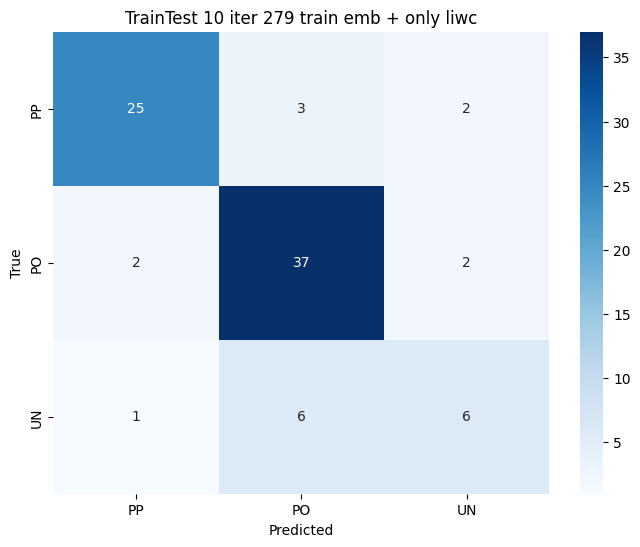

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-106-c04c1b255a2b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_label['PP_prob'] = list(a['PP'])
<ipython-input-106-c04c1b255a2b>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.81      0.85      0.83        41
           2       0.62      0.38      0.48        13

    accuracy                           0.80        84
   macro avg       0.75      0.71      0.72        84
weighted avg       0.79      0.80      0.79        84



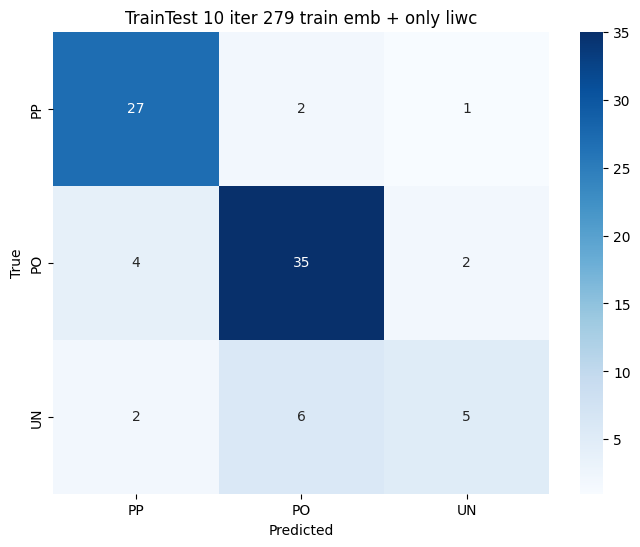

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-106-c04c1b255a2b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_label['PP_prob'] = list(a['PP'])
<ipython-input-106-c04c1b255a2b>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.83      0.98      0.90        41
           2       0.86      0.46      0.60        13

    accuracy                           0.88        84
   macro avg       0.89      0.79      0.82        84
weighted avg       0.88      0.88      0.87        84



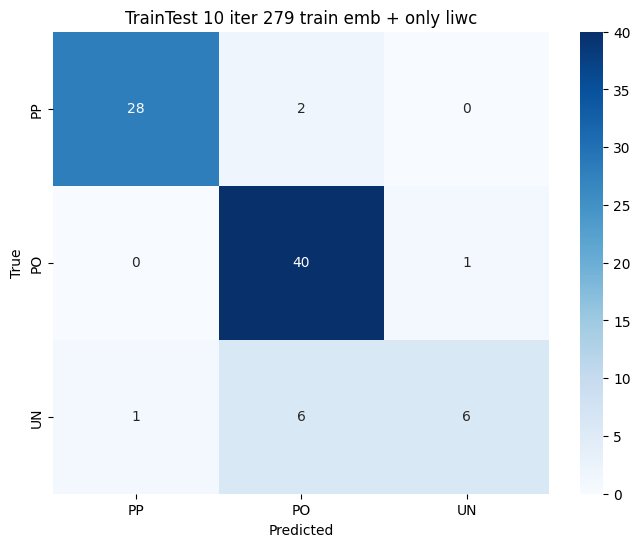

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-106-c04c1b255a2b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_label['PP_prob'] = list(a['PP'])
<ipython-input-106-c04c1b255a2b>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.83      0.95      0.89        41
           2       0.78      0.54      0.64        13

    accuracy                           0.87        84
   macro avg       0.86      0.80      0.82        84
weighted avg       0.87      0.87      0.86        84



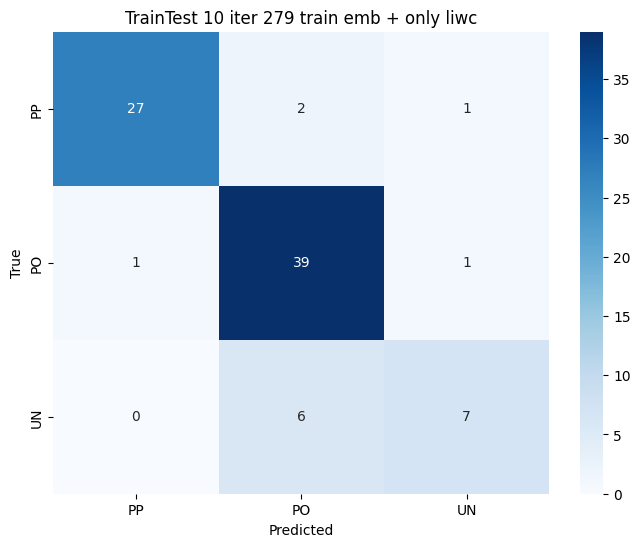

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-106-c04c1b255a2b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_label['PP_prob'] = list(a['PP'])
<ipython-input-106-c04c1b255a2b>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.81      0.93      0.86        41
           2       0.86      0.46      0.60        13

    accuracy                           0.85        84
   macro avg       0.86      0.76      0.79        84
weighted avg       0.85      0.85      0.84        84



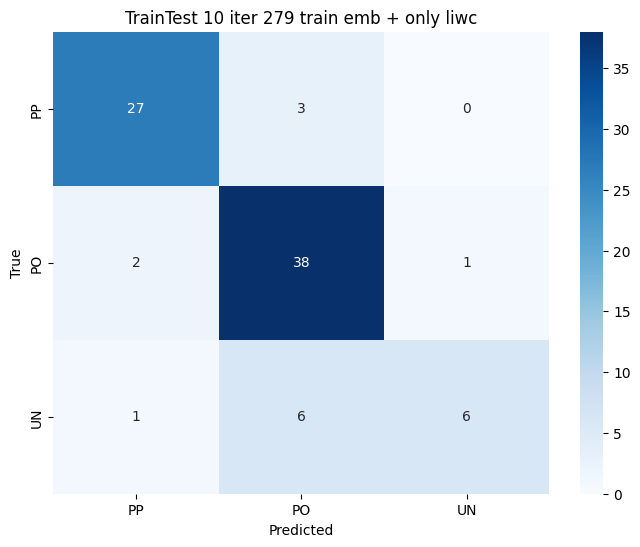

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-106-c04c1b255a2b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_label['PP_prob'] = list(a['PP'])
<ipython-input-106-c04c1b255a2b>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.81      0.95      0.88        41
           2       0.82      0.69      0.75        13

    accuracy                           0.85        84
   macro avg       0.85      0.80      0.82        84
weighted avg       0.85      0.85      0.84        84



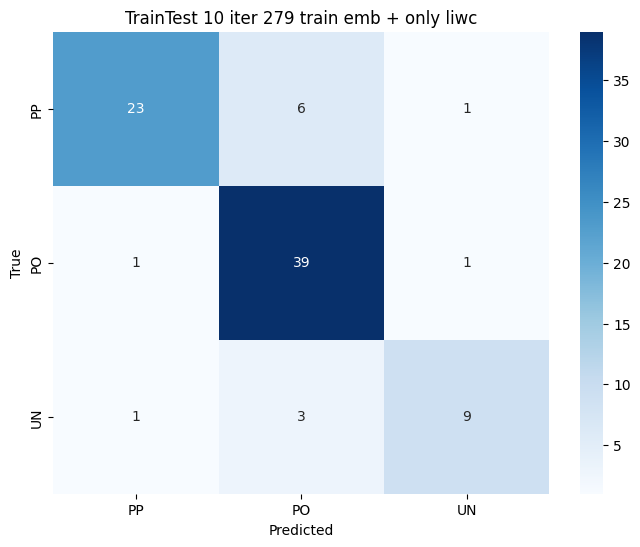

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-106-c04c1b255a2b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_label['PP_prob'] = list(a['PP'])
<ipython-input-106-c04c1b255a2b>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.86      0.93      0.89        41
           2       0.88      0.54      0.67        13

    accuracy                           0.87        84
   macro avg       0.87      0.80      0.82        84
weighted avg       0.87      0.87      0.86        84



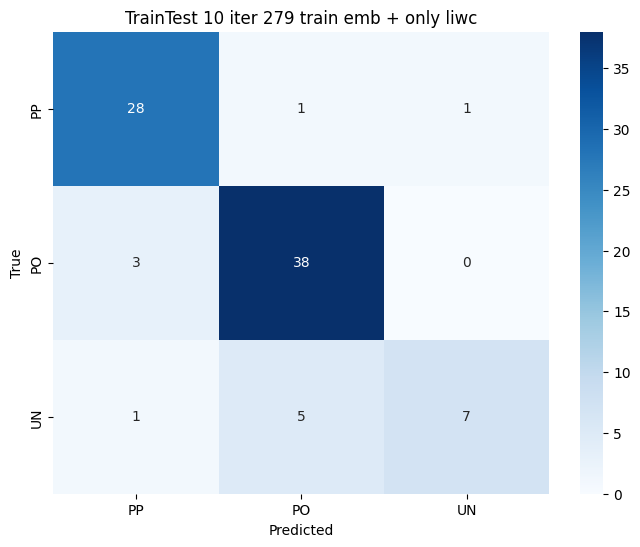

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-106-c04c1b255a2b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_label['PP_prob'] = list(a['PP'])
<ipython-input-106-c04c1b255a2b>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.89      1.00      0.94        41
           2       1.00      0.54      0.70        13

    accuracy                           0.92        84
   macro avg       0.94      0.84      0.86        84
weighted avg       0.92      0.92      0.91        84



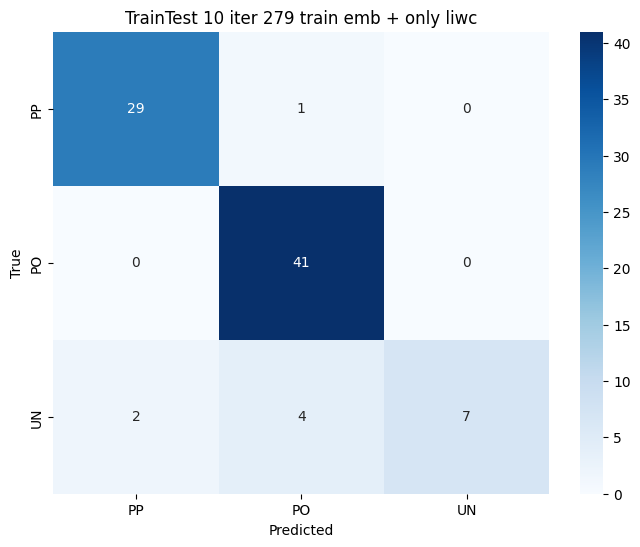

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-106-c04c1b255a2b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_label['PP_prob'] = list(a['PP'])
<ipython-input-106-c04c1b255a2b>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.81      0.93      0.86        41
           2       0.88      0.54      0.67        13

    accuracy                           0.86        84
   macro avg       0.87      0.79      0.82        84
weighted avg       0.86      0.86      0.85        84



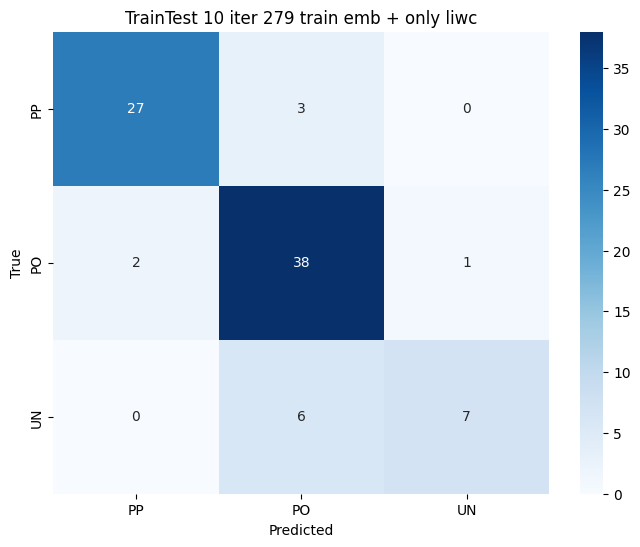

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-106-c04c1b255a2b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_label['PP_prob'] = list(a['PP'])
<ipython-input-106-c04c1b255a2b>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.79      0.93      0.85        41
           2       0.60      0.23      0.33        13

    accuracy                           0.81        84
   macro avg       0.75      0.69      0.69        84
weighted avg       0.79      0.81      0.78        84



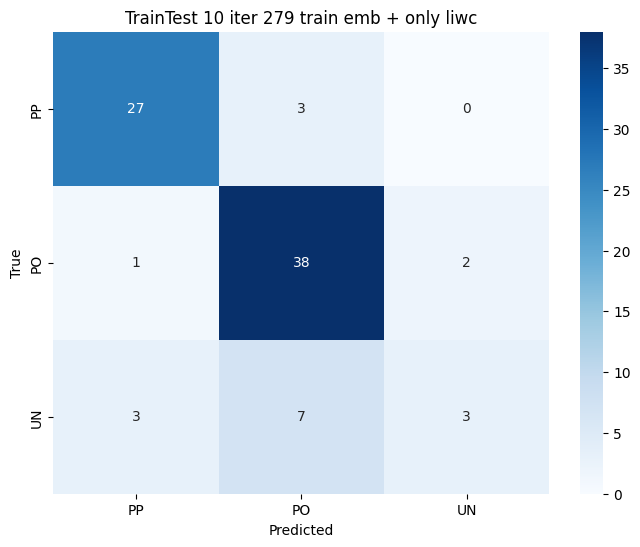

In [106]:
# Ref - https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f
xgb_f1scores = []
xgb_micro_f1scores = []
xgb_macro_f1scores = []
xgb_rocaucscore = []
xgb_praucscore = []
cond1_intersection = set() # empty set to store the intersection of lists
cond2_intersection = set()

for run in range(10):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=run, stratify = y)

    clf_xgb = xgb.XGBClassifier(objective='multi:softmax', missing=0, seed=42, num_class=3)

    # XGBoost
    clf_xgb.fit(X_train, y_train,
              verbose=False,  # set to True for individual use
              early_stopping_rounds=10,
              #eval_metrics='aucpr',
              eval_set = [(X_test,y_test)])
    y_pred = clf_xgb.predict(X_test)

    f1 = f1_score(y_test, y_pred,average='weighted')
    xgb_f1scores.append(f1)

    micro_f1 = f1_score(y_test, y_pred, average='micro')
    xgb_micro_f1scores.append(micro_f1)

    macro_f1 = f1_score(y_test, y_pred, average='macro')
    xgb_macro_f1scores.append(macro_f1)

    # run this for emb+liwc
    a = clf_xgb.predict_proba(   np.concatenate((    unannotated_and_messy_standardized_liwc, np.array(df_unannotated_and_messy['twitter4sse_embeddings'].tolist())   ), axis=1)        )
    a = pd.DataFrame(a, columns=['PP', 'PONP', 'UN'])
    a

    # run for only emb+liwc
    unannotated_and_messy_prob_label['PP_prob'] = list(a['PP'])
    unannotated_and_messy_prob_label['PONP_prob'] = list(a['PONP'])
    unannotated_and_messy_prob_label['UN_prob'] = list(a['UN'])

    # condition where the highest probablity is less than 0.7
    condition1 = unannotated_and_messy_prob_label[['PP_prob', 'PONP_prob', 'UN_prob']].max(axis=1) < 0.7
    df_unannotatedproblabel_cond1_index = list(unannotated_and_messy_prob_label[condition1].index)

    if run == 0:   # If it's the first iteration, initialize the set with the first list
        cond1_intersection.update(df_unannotatedproblabel_cond1_index)
    else:   # For subsequent iterations, take the intersection with the previous set
      if run < 4:
        cond1_intersection.intersection_update(df_unannotatedproblabel_cond1_index)  # intersection_update() method removes the items that is not present in both sets

# ------------------

    # condition where the difference between 2 highest probabilites in less than 0.4
    c = unannotated_and_messy_prob_label[['PP_prob', 'PONP_prob', 'UN_prob']].apply(lambda x: sorted(x, reverse=True), axis=1)
    condition2 = c.apply(lambda x: x[0] - x[1]) < 0.4
    df_unannotatedproblabel_cond2_index = list(unannotated_and_messy_prob_label[condition2].index)

    if run == 0:   # If it's the first iteration, initialize the set with the first list
        cond2_intersection.update(df_unannotatedproblabel_cond2_index)
    else:   # For subsequent iterations, take the intersection with the previous set
      if run < 4:
        cond2_intersection.intersection_update(df_unannotatedproblabel_cond2_index)  # intersection_update() method removes the items that is not present in both sets

    class_report = classification_report(y_test, y_pred)   # this will print reports of all 10 different sets of folds
    print(class_report)

    cm = confusion_matrix(y_test, y_pred)    # this will print CMs of all 10 different sets of folds
    plt.figure(figsize=(8, 6))
    labels = ['PP', 'PO', 'UN']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('TrainTest 10 iter 279 train emb + only liwc')
    plt.show()

    #rocaucscore = roc_auc_score(y_test, y_pred, multi_class='ovr')
    #xgb_rocaucscore.append(rocaucscore)

    # print(y_test.shape, y_pred.shape)
    # y_pred_prob = clf_xgb.predict_proba(X_test)
    # print(np.unique(y_test))
    # print(y_pred_prob.shape[1])
    # rocaucscore = roc_auc_score(y_test, y_pred_prob, multi_class='ovo')

    # precision, recall, thresholds = precision_recall_curve(y_test, y_pred)  # Compute precision, recall, and thresholds
    # pr_auc = auc(recall, precision)  # Calculate PR-AUC
    # xgb_praucscore.append(pr_auc)

# Convert the final set back to a list to get the result
df_unannotatedproblabel_cond1_index = list(cond1_intersection)
df_unannotatedproblabel_cond2_index = list(cond2_intersection)

In [95]:
print(xgb_f1scores)
print(np.mean(xgb_f1scores))
print(np.std(xgb_f1scores))

[0.8037885818995265, 0.7865646258503401, 0.8705774863744774, 0.8636270338856545, 0.8358225108225108, 0.8425415876258574, 0.8621698141622242, 0.9079555752958803, 0.851587913028591, 0.7845469802091648]
0.8409182109154226
0.037408666631243565


In [96]:
max(xgb_f1scores), xgb_f1scores.index(max(xgb_f1scores)), min(xgb_f1scores), xgb_f1scores.index(min(xgb_f1scores)) # remember, this is index value, so if 2nd index has the highest f1 score, tht means the corresponding CM is the 3rd one

(0.9079555752958803, 7, 0.7845469802091648, 9)

In [ ]:
max(xgb_f1scores), xgb_f1scores.index(max(xgb_f1scores)), min(xgb_f1scores), xgb_f1scores.index(min(xgb_f1scores)) # remember, this is index value, so if 2nd index has the highest f1 score, tht means the corresponding CM is the 3rd one

(0.9079555752958803, 7, 0.7845469802091648, 9)

In [97]:
print(xgb_micro_f1scores)
print(np.mean(xgb_micro_f1scores))
print(np.std(xgb_micro_f1scores))

[0.8095238095238095, 0.7976190476190477, 0.8809523809523809, 0.8690476190476191, 0.8452380952380952, 0.8452380952380952, 0.8690476190476191, 0.9166666666666666, 0.8571428571428571, 0.8095238095238095]
0.85
0.03499271061118824


In [ ]:
max(xgb_micro_f1scores), xgb_micro_f1scores.index(max(xgb_micro_f1scores)), min(xgb_micro_f1scores), xgb_micro_f1scores.index(min(xgb_micro_f1scores))

(0.9166666666666666, 7, 0.7976190476190477, 1)

In [ ]:
print(xgb_macro_f1scores)
print(np.mean(xgb_macro_f1scores))
print(np.std(xgb_macro_f1scores))

[0.7447942695319006, 0.7222222222222222, 0.8160096489557546, 0.8179205851619645, 0.787878787878788, 0.8209227102485529, 0.821336706725701, 0.8644494692544439, 0.815185755863722, 0.6908372730807802]
0.790155742892383
0.051035476389364655


In [ ]:
max(xgb_macro_f1scores), xgb_macro_f1scores.index(max(xgb_macro_f1scores)), min(xgb_macro_f1scores), xgb_macro_f1scores.index(min(xgb_macro_f1scores))

(0.8644494692544439, 7, 0.6908372730807802, 9)

## Discrepancy

In [107]:
unannotated_and_messy_prob_label.loc[df_unannotatedproblabel_cond1_index]

,text,PP_prob,PONP_prob,UN_prob
8194,It's Sundayyyyy? Time to chill!\n#weekendvibes...,0.071102,0.320958,0.607940
2051,Today’s retro indoor activity. Shake n’ vac. #...,0.061416,0.312359,0.626225
4105,I listened to Giuliani on 9/11. Now I have lun...,0.267646,0.425691,0.306664
2058,"It's Saturday, treat yourself for a busy week ...",0.237143,0.395714,0.367143
12303,This dofus went around shaking people's hands ...,0.081349,0.767290,0.151360
...,...,...,...,...
14317,"This article changed my perspective of life, c...",0.058896,0.658938,0.282166
4090,Have to say how grateful I am for the service ...,0.317625,0.377974,0.304401
2043,My kind of panic buying. ♥️📚⭐\n\n#panicbuying ...,0.289824,0.312297,0.397878
2044,Watching Judge Judy touch someone's phone just...,0.223847,0.527610,0.248543


In [108]:
unannotated_and_messy_prob_label['cond1'] = [1 if i in df_unannotatedproblabel_cond1_index else 0 for i in unannotated_and_messy_prob_label.index]
unannotated_and_messy_prob_label['cond2'] = [1 if i in df_unannotatedproblabel_cond2_index else 0 for i in unannotated_and_messy_prob_label.index]

<ipython-input-108-9ccb891b01f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_label['cond1'] = [1 if i in df_unannotatedproblabel_cond1_index else 0 for i in unannotated_and_messy_prob_label.index]
<ipython-input-108-9ccb891b01f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unannotated_and_messy_prob_label['cond2'] = [1 if i in df_unannotatedproblabel_cond2_index else 0 for i in unannotated_and_messy_prob_label.index]


In [113]:
df_unannotated_and_messy_discrepancy = unannotated_and_messy_prob_label[(unannotated_and_messy_prob_label['cond1'] == 1) | (unannotated_and_messy_prob_label['cond2'] == 1)]
df_unannotated_and_messy_discrepancy

,text,PP_prob,PONP_prob,UN_prob,cond1,cond2
26,Will people return to shaking hands post pande...,0.027293,0.792557,0.180150,1,0
31,"I pulled the audio, all I was doing was cussin...",0.861772,0.075109,0.063119,1,0
58,The Psychological Impact of #coronavirus (#CNN...,0.631114,0.207607,0.161279,1,1
62,https://t.co/ErRN7PIAAa\n\nInsights from my ad...,0.169191,0.504569,0.326240,1,1
81,I’m gonna be delighted to tell my kids how #CO...,0.637982,0.302120,0.059898,1,0
...,...,...,...,...,...,...
16175,#HateisAVirus by Dennis Dizzy Doan\n\nYou migh...,0.095445,0.774428,0.130127,1,1
16219,Leaders are saying Don't Panic and I want to s...,0.637516,0.293819,0.068665,1,0
16236,Which country will be first out of the traps a...,0.476629,0.297067,0.226304,1,1
16243,"Anxiety, depression and fear are major side ef...",0.615992,0.235867,0.148141,1,1


In [115]:
df_unannotated_and_messy_discrepancy[(df_unannotated_and_messy_discrepancy['cond1']) == 0 & (df_unannotated_and_messy_discrepancy['cond2'] == 1)]

,text,PP_prob,PONP_prob,UN_prob,cond1,cond2
